# Working Environment

We import all the packages you should need below. However, feel free to import extra packages. If you need to install some of these packages (ex: **rasterio**), you can access your shell and install like this: 

```shell
!pip install myPackage
```



```shell
!pip install -e git+https://github.com/scikit-learn/scikit-learn.git
```

In [1]:
# All the imports are here
import warnings
from os import listdir
from os.path import isfile, join

import numpy as np
import rasterio

from matplotlib import pyplot as plt
%matplotlib inline 


# my imports
from statistics import mean

# Data Manipulation Challenge description & instructions

In this challenge, you will have to load and manipulate satellite images, a typical daily task at Kayrros. Data manipulation is one of the core skills one should master, even before thinking about fancy algorithms and data pipelines. 

You will not be required to have any specific knowledge on imagery, as we will provide you with the necessary guidelines.

Please keep your code clean and don't forget to comment your code. You are also encouraged to provide as much detail as you can in markdown cells or in comments, even if you have ideas you do not have time to explore. We will evaluate the cleanliness of your code as much as your results.

Have fun!

# Data loading and data description

## Setup

In [3]:
# Define the path where the images are located
IMG_PATH = 'data/'

# The functions below will be useful to load tif images as arrays
def rio_open(p):
    """
    Open an image with rasterio.

    Args:
        p: path to the image file

    Returns:
        rasterio dataset
    """
    with warnings.catch_warnings():  # noisy warning may occur here
        warnings.filterwarnings("ignore", category=UserWarning)
        return rasterio.open(p)

def rio_read(p):
    """
    Read an image with rasterio.

    Args:
        p: path to the image file

    Returns:
        numpy array
    """
    with rio_open(p) as x:
        return x.read().transpose((1, 2, 0)).squeeze()

## Loading and visualizing your first random satellite image band

Each satellite image is composed of 13 bands, going from visible light to near infrared. 

You will find these bands in the `data/` folder, under the format [image\_date]\_[image\_number].tif

The usual RGB images you are used to see (a picture for instance) are made of bands B02 (Blue), B03 (Green) and B04 (Red)

(150, 150)


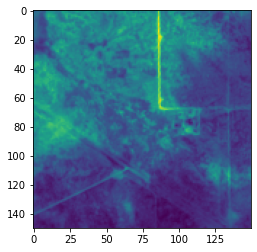

In [4]:
# Here, we show you how to load a given band from a random image and to visualize it
random_image_band = 'data/20170106_B02.tif'
img = rio_read(random_image_band)
print(img.shape) 

plt.imshow(img)

## Loading the data set

In this section, you are expected to load the full data set in the following format: **dataset = {img\_date: {'B01': img\_B01_array, ..., 'B12': img\_B12_array}}**, where img\_B0X_array are the image bands as arrays, i.e. the output of the rio_read() function

In [20]:
# Load the dataset under the required format
# WRITE YOUR CODE HERE

files = listdir(IMG_PATH)
bands, dates = [], []

# # loop through list to get all individual dates and bands
each_file = [i.split('_') for i in files] # subset string on seperator
for i in each_file: 
    bands.append(i[1][:-4]) # subset last 4 str characs 
    dates.append(i[0])

# # rm duplicates and sort alphabetically
bands = sorted(list(set(bands)))
dates = sorted(list(set(dates)) )


# rearrange the bands in order: ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
B8A = bands[12::]
bands.remove(B8A[0])     # remove 12th band B8A
bands.insert(8, B8A[0])  # add B8A in 8th place
# print(bands)


inner_dataset, dataset = {}, {}

# for every date + band, make a string and then read in file. after 12 bands populate the outer dictionary and repeat with a new date
for i in dates:
    for j in bands:
        file = str(i)+"_"+str(j)+".tif"  # create filestring to read "20170106_B01.tif"
#         inner_dataset[j] = file  # proof of concept, slows my computer
        inner_dataset[j] = rio_read(join(IMG_PATH, file))
    dataset[i]=inner_dataset
    inner_dataset={} # wipe for next 13 inner

# print(dataset)

{'20170106': {'B01': array([[1815, 1935, 2028, 2036, 2054, 2017, 2011, 1979, 1943, 1951, 2029,
        2072, 2037, 2071, 2084, 2016, 2018, 1912, 1824, 1814, 1747, 1765,
        1796, 1781, 1776],
       [1808, 1877, 2040, 2022, 2018, 2012, 2020, 1951, 1927, 1953, 2036,
        2046, 2033, 2093, 2162, 2066, 2046, 1985, 1896, 1835, 1811, 1761,
        1691, 1677, 1687],
       [1809, 1800, 1965, 2036, 2022, 1993, 1989, 1990, 1987, 2039, 2061,
        1987, 1994, 2061, 2221, 2067, 2004, 2008, 2000, 1930, 1916, 1851,
        1704, 1653, 1649],
       [1728, 1740, 1914, 1992, 1991, 1939, 1898, 1917, 1924, 2014, 2027,
        2003, 1994, 2062, 2232, 2052, 2018, 2040, 2051, 2012, 1927, 1846,
        1739, 1643, 1592],
       [1699, 1727, 1946, 2046, 1982, 1921, 1866, 1876, 1947, 1906, 1869,
        1964, 1988, 2079, 2160, 1953, 1950, 2030, 1977, 1919, 1839, 1778,
        1738, 1658, 1589],
       [1933, 1896, 1862, 1969, 1992, 1968, 1969, 1940, 1957, 1896, 1849,
        1915, 1944, 2028, 2109

In [8]:
B8A

['B8A']

In [17]:
bands[12::]

['B8A']

[[1742 1625 1675 ... 1708 1614 1616]
 [1699 1611 1664 ... 1710 1647 1593]
 [1749 1693 1718 ... 1639 1591 1559]
 ...
 [1217 1202 1182 ... 1287 1300 1239]
 [1222 1222 1227 ... 1232 1262 1294]
 [1227 1236 1221 ... 1186 1245 1286]]


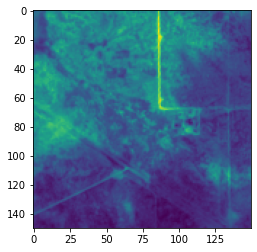

In [22]:
# # Sanity check: visualize the 3rd band of the image from 2018/05/31
# # WRITE YOUR CODE HERE

san_check = dataset['20170106']['B02']
print(san_check)


# added later once imshow() learned
san_check.shape
san_check = np.expand_dims(san_check, axis=2) # get into imshow format by adding a 3rd axis
san_check.shape  # (150, 150, 1)
plt.imshow(san_check)

In [23]:
# each_file

# Generating a RGB image 

Now we know how to visualize a given satellite image band, we are going to build a function that will allow us to visualize a given satellite image as an RGB image.

A RGB image can be represented as a 3D array, with the dimensions [channel, img_height, img_width] or [img_height, img_width, channel], with channels B02, B03 and B04.

In [24]:
# In order to test your function, you can use the following random image
# We want to display the image as an RGB composite, i.e. B04, B03, B02
img = np.array([dataset['20170630']['B04'], dataset['20170630']['B03'], dataset['20170630']['B02']])

(150, 150, 3)


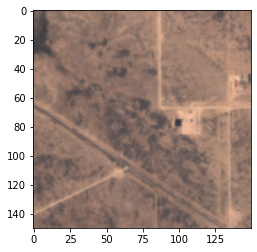

In [25]:
# Build your function that takes as input, a 3D array with B04, B03, B02 bands and returns the final rgb_img ready to be visualized

# WRITE YOUR CODE HERE by completing the function below

def generate_rgb_img(img):
    
    # 1. First, you need to normalize your image. Otherwise you won't be able to visualize it.
    # Normalise your image here
    
    #  Brownlee 2019 https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/
    img = img.astype('float32')  # make dtype capable of handling decimals for normalisation division
    img *= (255.0/img.max())   # user 'Unutbu' 2009 on https://stackoverflow.com/questions/1735025/how-to-normalize-a-numpy-array-to-within-a-certain-range
    
    
    # 2. The function imshow() allows you to visualise an RGB image, but it needs to be under the format [img_height, img_width, channel_number]
    # It's currently under the format [channel_number, img_height, img_width], so transform the image into the correct format

    img.shape  # (3, 150, 150). for PIL.Image.fromarray() to work, need (150, 150, 3) 
    img2 = np.zeros((img.shape[1],img.shape[2],img.shape[0]), dtype=np.uint8)   # arrange a blank array of right dimensions in right shape
    # dtype=np.uint8 as 'RGB images are usually stored as 3 dimensional arrays of 8-bit unsigned integers' McBride 2017 https://www.pythoninformer.com/python-libraries/numpy/numpy-and-images/   

    # populate with data
    img2[:,:,0] = img[0]
    img2[:,:,1] = img[1]
    img2[:,:,2] = img[2]
    
    print(img2.shape)
  
    # Display the RGB image 
    plt.imshow(img2)
    return None

# Sanity check: test your function
# WRITE YOUR CODE HERE

generate_rgb_img(img)

# Detecting patterns in satellite imagery: flaring detection
In this section, we are going to detect some activity that might be difficult to observe in an RGB image by utilizing other satellite bands.

The activity we want to detect is called flaring: the process of burning gas in an open flame, which can be detected easily in the infrared spectrum picked up by the satellite.

(150, 150, 3)


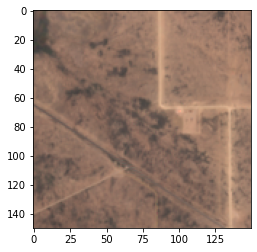

In [26]:
# Load and visualize the RGB image on 2018/05/31. Can you easily identify flaring ?

# WRITE YOUR CODE HERE
img = np.array([dataset['20180531']['B04'], dataset['20180531']['B03'], dataset['20180531']['B02']])
generate_rgb_img(img)
# no, cannot easily identify flaring

(1, 75, 75)
raw range: 5319 24079
normed range: 56.328957 255.0
range: 56 255


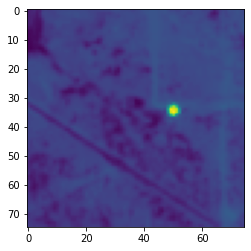

In [27]:
# You can generate a heatmap by simply adding B11 and B12, that is to say: heatmap = B11 + B12
# Below, generate a heatmap of the image and visualize it. You should see a clear signal on the center-right of the image

# WRITE YOUR CODE HERE


#  takes in (1, 75, 75), outputs (75, 75, 1) for imshow()
def alter_arr_for_imshow(old_arr):
    new_arr = np.zeros((old_arr.shape[1],old_arr.shape[2],old_arr.shape[0]), dtype=np.uint8)   # arrange a blank array of right dimensions in right shape
    new_arr[:,:,0] = old_arr[0] # only populate one band
    return new_arr    


# same process as generate_rgb_img() bvt only using 2 bands
heatmap = np.array([dataset['20180531']['B11']+dataset['20180531']['B12']])
print(heatmap.shape)

# Do some normalising so it appears visually strong
print('raw range:', heatmap.min(), heatmap.max())
heatmap = heatmap.astype('float32')  # make dtype capable of handling decimals for normalisation division
heatmap *= (255.0/heatmap.max())     # normalises between 0 and 255 .. imshow for RGB images
print('normed range:', heatmap.min(), heatmap.max())

# now normalised, make the heatmap
heatmap = alter_arr_for_imshow(heatmap)
plt.imshow(heatmap)

print('range:', heatmap.min(), heatmap.max())


(75, 75, 1)
nice
34 49
i think there is a problem with my normalising process as all pixel values are >15
also 15 units of what? When normalised between 0:255? but MS imagery is not bounded by this.


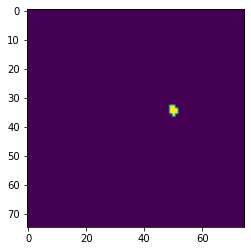

In [29]:
# To help us automate the detection process, it is easier to produce a mask of the flaring activity
# We can consider that there is flaring activity on a pixel if the value of the pixel is above 15.000
# Generate a mask of the flaring activity in the previous heatmap (mask: pixel=1 where there is flaring, pixel=0 where there is no flaring)
# Visualize the resulting mask

# WRITE YOUR CODE HERE


# function returns mask. function written as I thought I was going to use again
def make_mask(array, threshold):
    mask_ = array > threshold  # make a boolean aray
    mask_ = mask_.astype(int) # make 0 = false, 1 = True
    return mask_
    

# i think there is a problem with my normalising process as all pixel values are >15
# mask = make_mask(heatmap, 15)  # aparently all pixels > 15
mask = make_mask(heatmap, 200)   # setting an arbitrary threshold 200/255 to get sensible output
print(mask.shape)  # (75, 75, 1)
plt.imshow(mask)   # already in format for imshow as input is the new heatmap


# basic checks
if np.any(pix > 15 for pix in heatmap):  
    print('nice')
    
mask2D = mask[:, :, 0]  # (75, 75, 0) --> (75, 75) so index works
result = np.where(mask2D == 1)
print(mean(result[0]), mean(result[1])) # y, x = -24, 49 seems about right

print('i think there is a problem with my normalising process as all pixel values are >15')
print('also 15 units of what? When normalised between 0:255? but MS imagery is not bounded by this.')

In [63]:
# We consider an image to have flaring activity if the number of pixels above 15.000 in an image is >= 5.
# Write below a function that returns all the dates for which we should detect flaring activity in the data we provided

# WRITE YOUR CODE HERE

def return_flare_dates(data_dict, threshold):
    datelist = [] 
    for date in data_dict:                                           # for each date, select bands by name into np array
        heatmap = np.array([dataset[date]['B11']+dataset[date]['B12']])
        heatmap = heatmap.astype('float32')             # make dtype capable of handling decimals for normalisation division
#         heatmap *= (255.0/heatmap.max())                 # 255 is no longer the upper max, as not RGB
#         heatmap = (heatmap/heatmap.max())                  # scale between max in each image 0~1
#    have just left as raw values
#         print(heatmap)
        if np.any(pix > threshold for pix in heatmap):     # if any pix in array above thresh, return date of flare
            datelist.append(date)

    return datelist
        
flaring_dates = return_flare_dates(dataset, 15)  # thresh = 15
# flaring_dates

In [57]:
# # if len(np.where(heatmap>15 for pix in heatmap)) >= 5:
# #     print('append')
# # else:
# #     print('don"t append')

# # len(np.where(heatmap>15 for pix in heatmap))

# np.where(heatmap>15)  # for pix in heatmap

# len(np.where(heatmap>15))

3

Question: if you had 1,000 images to process, would you keep the same code structure? What would you change?

In [52]:
# Answer the question here, no need to re-write any code

# I definitely would not loop through each file. I would do similar and loop only through dates (n=1000/13) and explicitly name bands like so.
# Alternatively I could loop through a list of all files but in intervals of 13 starting at the 11th and 12th bands?, 'for i in range(start, stop, step)''

# More fun on data manipulation: zooming in an image on the flaring activity detected

two answers have been provided as it has not been stressed if the single target is what we are after,
or if we are after multiple different flares. 
Context of problem is light

ANSWER 1
centre of the flaring is 37 50
 this is the same imshow() as below if you rotated the plt 90deg clockwise


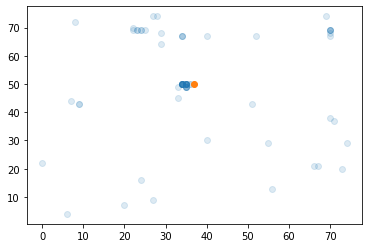


--------------------------------------------------------------------------

ANSWER 2
max val 890062
max coords: -y, x: 35 50
890062


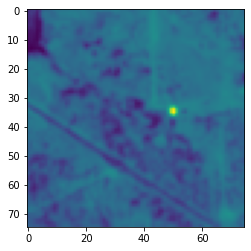

In [53]:
# First, find the center of the flaring activity, that is to say, given all the images for which you detected that there was a flare, 
# combine them to find the center of the flaring activity in the image time series
# Your code should return the index of the pixel at the center of the flaring activity

# WRITE YOUR CODE HERE


print('two answers have been provided as it has not been stressed if the single target is what we are after,\n'
     'or if we are after multiple different flares. \nContext of problem is light')



# MAIN ANSWER
# ----------------------------------------------------------------
x_list, y_list = [], []
# for each flaring date, make heatmap and find centre for that date
for date in flaring_dates:
    heatmap = np.array([dataset[date]['B11']+dataset[date]['B12']])

    # find index of max value for each date and add to list
    heatmap2D = heatmap[0, :, :]  # (1, 75, 75) --> (75, 75) so 2D index works
    index = np.where(heatmap2D == np.amax(heatmap2D)) # finds index of maxval in 2D array
    x_list.append(index[0][0])
    y_list.append(index[1][0])

# take an average if moving
xbar, ybar = mean(x_list), mean(y_list)
print()
print('ANSWER 1')
print('centre of the flaring is',xbar, ybar)
print(' this is the same imshow() as below if you rotated the plt 90deg clockwise')

# visually assess to see if centre is in diff place on diff day
plt.scatter(x_list, y_list, alpha=0.15)  # transparency to visually assess persistance of flaring centre
plt.scatter(xbar, ybar) # 
# plt.scatter(y_list, x_list, alpha=0.15)  # transparency to visually assess persistance of flaring centre
# plt.scatter(ybar, xbar) # 
plt.show()
# ----------------------------------------------------------------


print()
print('--------------------------------------------------------------------------')
print()
print('ANSWER 2')

# ALTERNATE ANSWER
# ----------------------------------------------------------------
# THIS ANSWER ASSUMES THAT THERE IS ONLY ONE CONSISTENT AREA OF FLARING - assumption seems to hold 

count = 0
# for every date with flaring, make heatmap and vertically stack into tall array
for date in flaring_dates:
    count = 1+ count
    heatmap = np.array([dataset[date]['B11']+dataset[date]['B12']])
    if count ==1:
        stack = heatmap
    if count != 1:
        stack = np.vstack((stack,heatmap))

# Sum through stack and check there are not other centers of flaring activity
summed = np.sum(stack, axis=0)  # make 3D array 2D via summing up along 0'th axis
summed.shape # (75, 75)
# Visually check assumption that flaring location is constant/stationary throughout all imgs
vis_check = np.expand_dims(summed, axis=2) # get into imshow format
plt.imshow(vis_check)


# Get the pixel with maximum value
max_val = np.amax(summed)
print('max val',max_val)

index = np.where(summed ==max_val) # finds index of maxval
print('max coords: -y, x:', index[0][0], index[1][0]) # -y , x

# double check
print(summed[
    index[0][0], index[1][0]
])
# this agrees with the axes on the imshow()... roughly, vertical axes start point is diff but can be traced
# ----------------------------------------------------------------

1695
(50, 50)
True


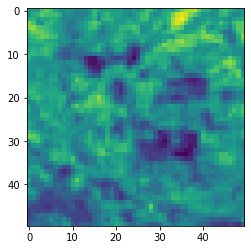

In [24]:
# Then, make a crop of band B02 using an image of your choice, centered on the pixel at the center of the flaring activity, with a size of 50 x 50 pixels
# If the crop is not entirely contained in the image, you can complete the missing pixels of the crop with the value 0
# Do not use any pre-built cropping functions from other libraries, only use umpy array manipulation.
# Visualize the crop


img = dataset['20170106']['B02']
plt.imshow(np.expand_dims(img, axis=2)) # get into imshow format

# central pixel = xbar amd ybar

print(img[xbar, ybar]) # B02 value at centre of 2D array

# slice image within img[start_x:end_x,start_y:end_y]
crop = img[(xbar-25):(xbar+25),(ybar-25):(ybar+25)]
plt.imshow(np.expand_dims(crop, axis=2))

# checks
print(crop.shape)
print(np.all(crop)) # all are > 0

(50, 50)
(50, 50, 1)
(100, 100, 1)


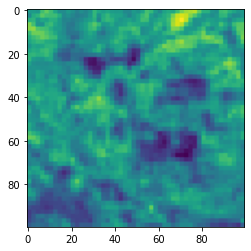

In [25]:
# Finally, zoom (expand the size) of the previously obtained crop, i.e. produce an image of size 100x100 pixels from the crop of size 50x50
# Do not use any pre-built functions from other libraries
# For this, you will have to create "new" pixels, that you can either interpolate or duplicate from neighboring existing pixels
# Visualize the resulting image

# WRITE YOUR CODE HERE

crop = img[(xbar-25):(xbar+25),(ybar-25):(ybar+25)]
print(crop.shape)
crop = np.expand_dims(crop, axis=2)
print(crop.shape)

# I won't pretend. I do not understand the underlying mechnism of this approach which does not use libraries
bigger_crop = crop.repeat(2, axis=0).repeat(2, axis=1)    # user 'matwilso' 2020  # https://stackoverflow.com/questions/48121916/numpy-resize-rescale-image

print(bigger_crop.shape)

plt.imshow(bigger_crop)

CONGRATS ! You made it. We hope you had fun, please send back your solution in due time.